In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [2]:
# Load the dataset
data = pd.read_csv('dataset.csv')
#pd.set_option('display.max_columns', None)
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
data.shape

(4424, 35)

In [4]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [5]:
# Get a summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [6]:
data['Mother\'s occupation'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4424 entries, 0 to 4423
Series name: Mother's occupation
Non-Null Count  Dtype
--------------  -----
4424 non-null   int64
dtypes: int64(1)
memory usage: 34.7 KB


In [7]:
# Get basic statistics of numerical features
data.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [8]:
# Check for missing values
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [9]:
data = data.rename(columns={'Nacionality': 'Nationality'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [10]:
data['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

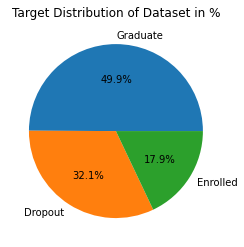

In [11]:
#store the value counts in a variable
data_target = data['Target'].value_counts()

#visualize the target variable
plt.pie(data_target, labels=data_target.index, autopct='%2.1f%%')
plt.title('Target Distribution of Dataset in %')
plt.show()

In [12]:
data['Gender'].value_counts()

0    2868
1    1556
Name: Gender, dtype: int64

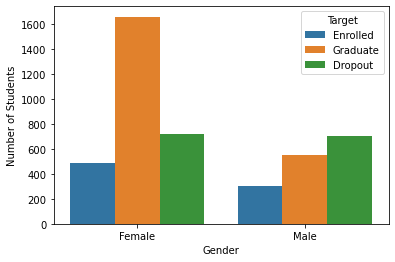

In [13]:
#15 gender affecting academic status of students
sns.countplot(data=data, x='Gender', hue='Target', hue_order=['Enrolled', 'Graduate', 'Dropout'])

plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.ylabel('Number of Students')
plt.show()

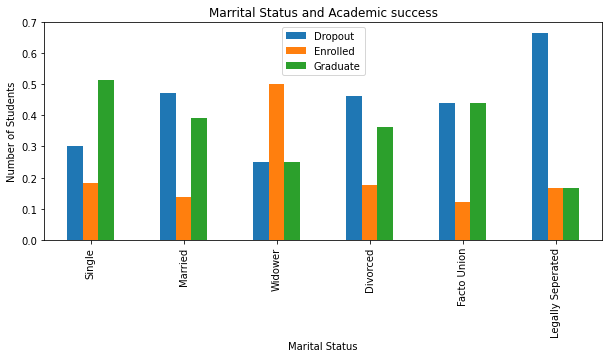

In [14]:
#0 Marital Status affecting the academic success of students
pd.crosstab(data["Marital status"], data["Target"], normalize='index').plot(kind="bar", figsize=(10,4), title="Marrital Status and Academic success", )
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Seperated'])

plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.legend(loc=9)
plt.show()

from the above bar graph:
- Students who are legally seperated stand a high chance of dropping out.
- Single students have more chance of graduating as their focus
- Marriend and divorced individuals have more chances of dropping out but the gap between dropping out and graduating is small.

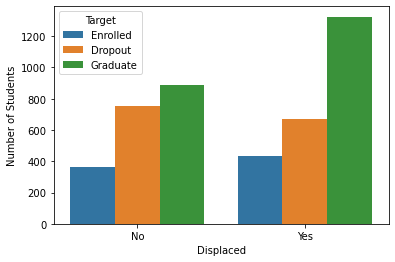

In [15]:
#11 Displaced students and the academic success of students
sns.countplot(data=data, x='Displaced', hue='Target', hue_order=['Enrolled', 'Dropout', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()

This shows that students enroll between the ages 17 and 70 with the mean age at age 23

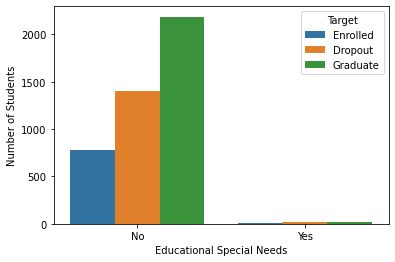

In [16]:
#12 Educational special Needs

sns.countplot(data=data, x='Educational special needs', hue='Target', hue_order=['Enrolled', 'Dropout', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Educational Special Needs')
plt.ylabel('Number of Students')
plt.show()

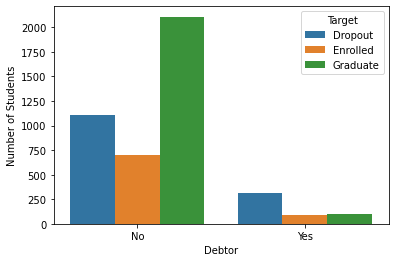

In [17]:
#13 Debtor
sns.countplot(data=data, x="Debtor", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Debtor')
plt.ylabel('Number of Students')
plt.show()

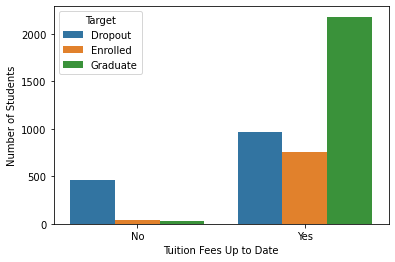

In [18]:
#14 Tuition fees up to date

sns.countplot(data=data, x="Tuition fees up to date", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Tuition Fees Up to Date')
plt.ylabel('Number of Students')
plt.show()

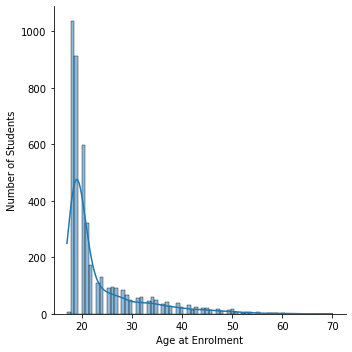

In [19]:
  #17 Age 
sns.displot(data=data, x='Age at enrollment', kde=True)
data['Age at enrollment'].describe()

plt.xlabel('Age at Enrolment')
plt.ylabel('Number of Students')
plt.show()

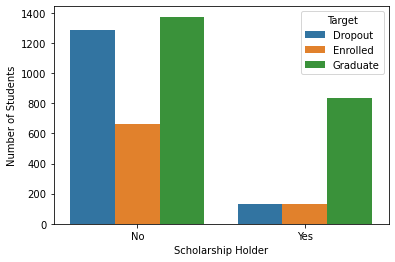

In [20]:
# Scholarship holder

sns.countplot(data=data, x="Scholarship holder", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Scholarship Holder')
plt.ylabel('Number of Students')
plt.show()


In [21]:
# Add the sem 1 data to the list of features to be removed
#features_tobe_removed.extend(["Curricular units 1st sem (credited)", "Curricular units 1st sem (enrolled)",
#       "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)"])
#features_tobe_removed

In [22]:
# Import library for encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

# Encode categorical variables using one-hot encoding
categorical_features = [
    'Marital status', 'Course', 'Daytime/evening attendance',
    'Previous qualification', "Mother's qualification", "Father's qualification",
    "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs',
    'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International'
]

encoders = {}
for feature in categorical_features:
    encoder = LabelEncoder()
    data[feature] = encoder.fit_transform(data[feature])
    encoders[feature] = encoder
    
    
joblib.dump(encoders, 'encoders.pkl')    


# Standardize numerical features
numerical_features = ['Age at enrollment']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [23]:
# Apply one-hot encoding to categorical features
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Define features (X) and target (y)
X = data_encoded.drop(columns=['Target'])
y = data_encoded['Target']


In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [25]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [27]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


# Get predicted probabilities for all classes
y_pred_proba = model.predict_proba(X_test)

In [28]:
# Evaluate ROC AUC score for multiclass classification
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

print("Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")

Model Performance:
Accuracy: 0.76
Precision: 0.74
Recall: 0.76
F1 Score: 0.74
ROC-AUC Score: 0.89


In [29]:
data['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

To predict student's dropout and academic success we dont ned the Enrolled category

In [30]:
# Remove all rows in the datafram where the value in the Target column equals Enrolled
students = data[data.Target != 'Enrolled']

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Determine the unique classes in y_test and y_pred
labels = sorted(data['Target'].unique())

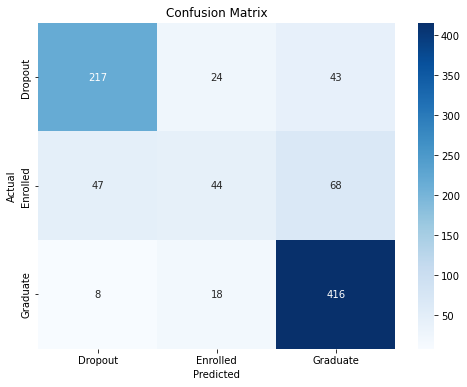

In [32]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Dropout', 'Enrolled', 'Graduate'], yticklabels=['Dropout', 'Enrolled', 'Graduate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

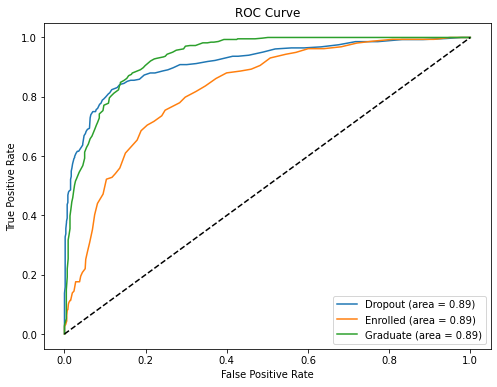

In [33]:
# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(model.classes_):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=class_label)
    plt.plot(fpr, tpr, label=f'{class_label} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib

# Save the trained model
joblib.dump(model, 'model.pkl')

print("Model trained and saved successfully!")

Model trained and saved successfully!


MODELLING ENCODING OF TARGET

In [35]:
# List of columns to remove
columns_to_remove = [
    'Nationality',
    'International',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)'
]

# Remove the specified columns
data.drop(columns=columns_to_remove, inplace=True)

# Display the updated dataframe info to confirm removal
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Mother's qualification                          4424 non-null   int64  
 7   Father's qualification                          4424 non-null   int64  
 8   Mother's occupation                             4424 non-null   int64  
 9   Father's occupation                      

In [36]:
# Converting Target Variable into Numeric Form

encoder = LabelEncoder()
students['Target'] = encoder.fit_transform(students['Target'])
students.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_1704\2046654656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  students['Target'] = encoder.fit_transform(students['Target'])


,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,8,5,1,1,0,1,12,9,5,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,0,6,1,10,1,0,1,0,2,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,0,1,5,4,1,0,1,21,26,9,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,0,8,2,14,1,0,1,22,26,5,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,1,12,1,2,0,0,1,21,27,9,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [37]:
# Display the updated dataframe info to confirm removal
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Mother's qualification                          4424 non-null   int64  
 7   Father's qualification                          4424 non-null   int64  
 8   Mother's occupation                             4424 non-null   int64  
 9   Father's occupation                      

In [38]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,8,5,1,1,0,12,9,5,9,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,0,6,1,10,1,0,0,2,3,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,0,1,5,4,1,0,21,26,9,9,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,0,8,2,14,1,0,22,26,5,3,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,1,12,1,2,0,0,21,27,9,9,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [39]:
# splitting Features and Target Variables into X and Y

X = data.drop('Target', axis=1)
y = data['Target']

In [40]:
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,8,5,1,1,0,12,9,5,9,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,0,6,1,10,1,0,0,2,3,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,0,1,5,4,1,0,21,26,9,9,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,0,8,2,14,1,0,22,26,5,3,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,1,12,1,2,0,0,21,27,9,9,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0,1,6,14,1,0,0,0,5,4,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,0,1,2,14,1,0,0,0,9,9,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,0,1,1,11,1,0,21,26,9,9,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,0,1,1,8,1,0,21,26,7,4,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [42]:
import joblib

joblib.dump(model, 'model.pkl')


['model.pkl']

In [43]:
joblib.dump(encoder, 'encoder_name.pkl')

['encoder_name.pkl']